In [1]:
from eptnr.rewards.egalitarian import EgalitarianTheilReward, BaseReward
from eptnr.constants.travel_metric import TravelMetric

from eptnr.analysis.full_problem_exploration import full_problem_exploration
from eptnr.plotting.solution_plotting import plot_full_problem_exploration
from inequality.theil import TheilD
import igraph as ig
import numpy as np
import geopandas as gpd
import pandas as pd

In [2]:
graph = ig.read('./test_cost_data/graph.picklez')
gdf = gpd.read_file('./test_cost_data/census_data.geojson')

In [3]:
gdf

,neighborhood,n_inh,n_purple,n_red,geometry
0,RC0,1000,500,500,POINT (0.00000 0.00000)
1,RC1,1000,500,500,POINT (3.00000 0.00000)
2,RC2,1000,500,500,POINT (3.00000 3.00000)
3,RC3,1000,500,500,POINT (0.00000 3.00000)


In [4]:
from eptnr.constants.travel_metric import TravelMetric
from eptnr.rewards.egalitarian import InverseTheilAndCostReward
from eptnr.analysis.full_problem_exploration import full_problem_exploration
from eptnr.plotting.solution_plotting import plot_full_problem_exploration
import itertools as it

census_data = gdf.copy()
census_data = census_data[['neighborhood', 'n_inh', 'n_purple', 'n_red', 'geometry']]

monetary_budget = 2600 * 2
total_graph_cost = sum(graph.es['cost'])

r = InverseTheilAndCostReward(census_data=census_data,
                              com_threshold=100,
                              total_graph_cost=total_graph_cost,
                              monetary_budget=monetary_budget,
                              groups=['red', 'purple'],
                              metrics=[TravelMetric.TT],
                              verbose=True)
r.evaluate(graph)

rewards = {}

n_edges = 2
possible_edges = it.combinations(graph.es.select(type_ne='walk', active_eq=1), n_edges)

for ps in possible_edges:
    g_prime = graph.copy()
    pseudo_index = '|'.join([f"{e.source_vertex['name']}->{e.target_vertex['name']}" for e in ps])
    pes = [e.index for e in ps]
    print(pes, pseudo_index)
    g_prime.es[pes]['active'] = 0
    rew = r.evaluate(g_prime)
    rewards[pseudo_index] = rew


INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=52	n_vertices=12Created subgraph:
	n_edges=52
	n_vertices=12
	available_edges=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=0.13709572414115917
	scaled_reward=0.13709572414115917
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=52	n_vertices=12Created subgraph:
	n_edges=50
	n_vertices=12
	available_edges=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
INFO

[48, 49] PT4->PT5|PT5->PT6
[48, 50] PT4->PT5|PT7->PT6
[48, 51] PT4->PT5|PT7->PT4
[49, 50] PT5->PT6|PT7->PT6
[49, 51] PT5->PT6|PT7->PT4
[50, 51] PT7->PT6|PT7->PT4


In [5]:
edge_types = list(np.unique(graph.es['type']))
edge_types.remove('walk')


INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/analysis/full_problem_exploration.py:Possible states: [[[]], [[48], [49], [50], [51]], [[48, 49], [48, 50], [48, 51], [49, 50], [49, 51], [50, 51]], [[48, 49, 50], [48, 49, 51], [48, 50, 51], [49, 50, 51]]]
  0%|          | 0/4 [00:00<?, ?it/s]INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=52	n_vertices=12Created subgraph:
	n_edges=52
	n_vertices=12
	available_edges=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=0.13709572414115917
	scaled_reward=0.13709572414115917
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/analys

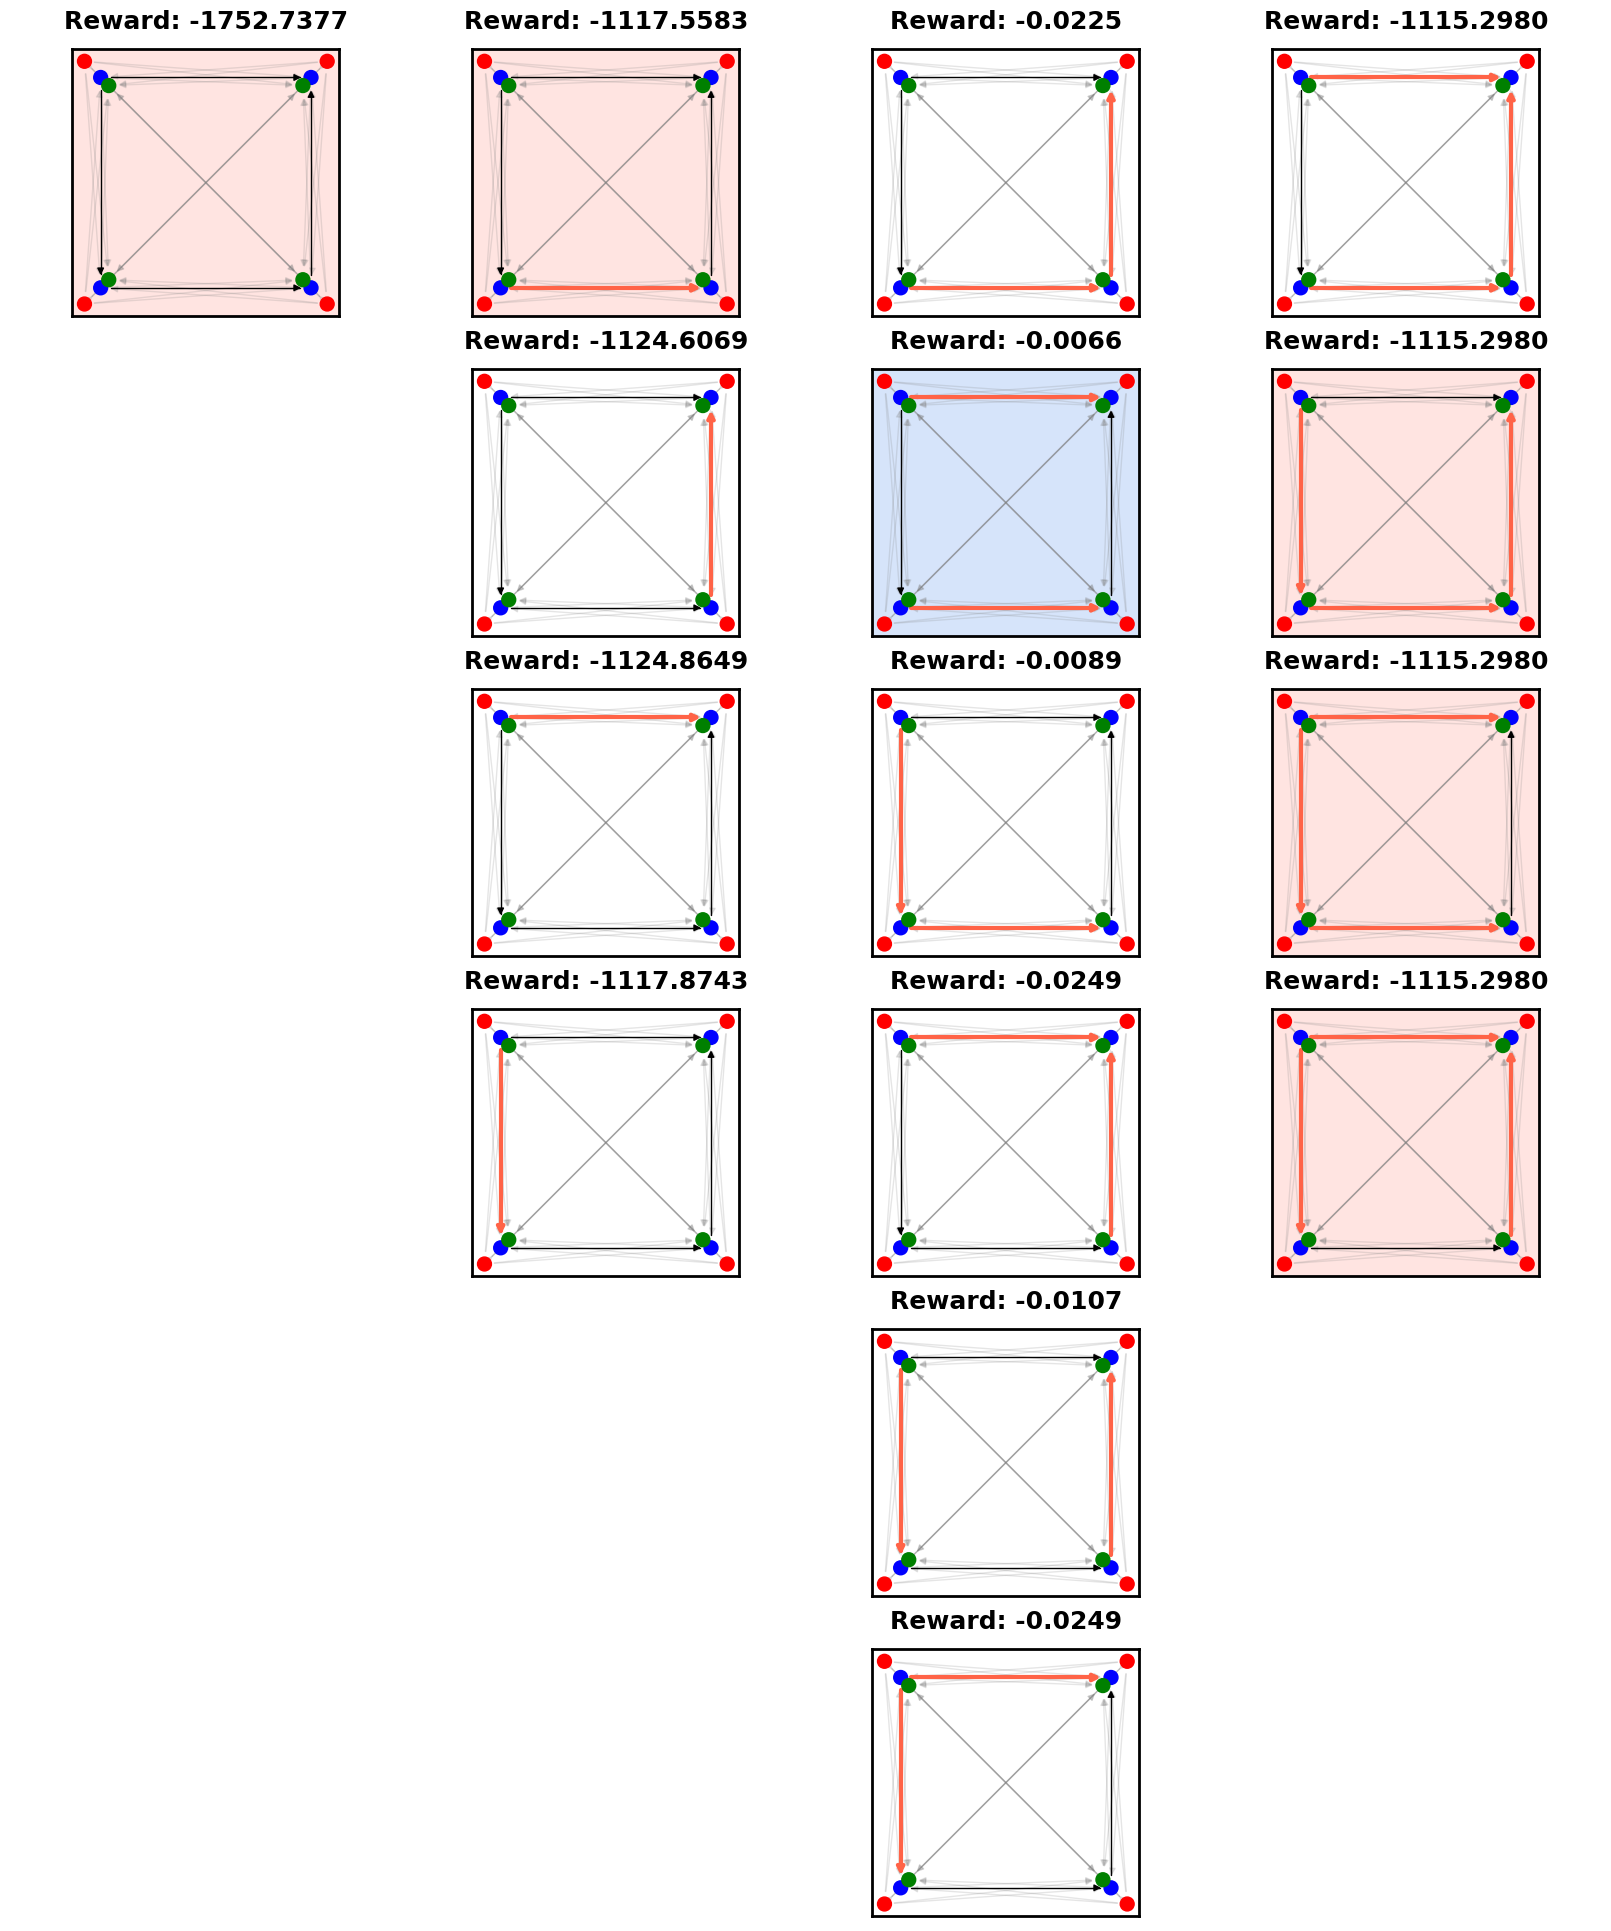

In [6]:
from matplotlib import pyplot as plt

configurations, rewards = full_problem_exploration(graph, r, edge_types)
fig, axs = plot_full_problem_exploration(base_graph=graph, configurations=configurations, rewards=rewards)
plt.show()